In [2]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json
import matplotlib as rcParams
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
#Load metadata.csv in the CORD-19 dataset and save it into a dataframe 

meta_data = pd.read_csv('filepath/metadata.csv')


/home/vineeta/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#info about the dataframe
meta_data.shape

(157712, 19)

In [6]:
#Preprocessing the data

#handling duplicate data (based on 'sha','title' and 'abstract')
print(meta_data[meta_data.duplicated(subset=['sha','title','abstract'], keep=False) == True])
meta_data.drop_duplicates(subset=['sha','title','abstract'],keep ='last',inplace=True)
print('Data Size after dropping duplicated data (based on abstract attribute):',meta_data.shape)

        cord_uid  sha                source_x  \
52      i5fcedbo  NaN                     PMC   
56      u09rn09u  NaN                     PMC   
235     pcnp1965  NaN                     PMC   
766     neeftptx  NaN                     PMC   
3207    y86m85pe  NaN                     PMC   
...          ...  ...                     ...   
157349  5tv572yc  NaN            Medline; PMC   
157498  rhno5ylc  NaN  Elsevier; Medline; PMC   
157576  8f1rld53  NaN            Medline; PMC   
157612  1rb4n3ru  NaN  Elsevier; Medline; PMC   
157648  cvgq5bel  NaN            Medline; PMC   

                                                    title  \
52                                   Scientific Abstracts   
56                                              ABSTRACTS   
235                                  Scientific Abstracts   
766     Epidemiology and viral etiologies of Severe Ac...   
3207                               Public health round-up   
...                                          

In [7]:
#function to deal with null values
#'No Information Available' will be replaced 
def dealing_with_null_values(dataset):
    dataset = dataset
    for i in dataset.columns:
        replace = []
        data  = dataset[i].isnull()
        count = 0
        for j,k in zip(data,dataset[i]):
            if (j==True):
                count = count+1
                replace.append('No Information Available')
            else:
                replace.append(k)
        print("Num of null values (",i,"):",count)
        dataset[i] = replace
    return dataset

meta_data = dealing_with_null_values(meta_data)

Num of null values ( cord_uid ): 0
Num of null values ( sha ): 86535
Num of null values ( source_x ): 0
Num of null values ( title ): 47
Num of null values ( doi ): 37793
Num of null values ( pmcid ): 82756
Num of null values ( pubmed_id ): 51702
Num of null values ( license ): 0
Num of null values ( abstract ): 41483
Num of null values ( publish_time ): 15
Num of null values ( authors ): 5718
Num of null values ( journal ): 8700
Num of null values ( mag_id ): 157712
Num of null values ( who_covidence_id ): 126561
Num of null values ( arxiv_id ): 155760
Num of null values ( pdf_json_files ): 86535
Num of null values ( pmc_json_files ): 103575
Num of null values ( url ): 24971
Num of null values ( s2_id ): 25319


In [33]:
#Document Vectorization using doc2vec from gensim

#importt gensim and doc2vec
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in meta_data['abstract'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs


In [34]:


# data representation of doc2vec for abstract column.
# Visualization the doc2vec representation
%time doc2vec = doc2vec()



CPU times: user 16min 43s, sys: 15.6 s, total: 16min 58s
Wall time: 6min 30s


/home/vineeta/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


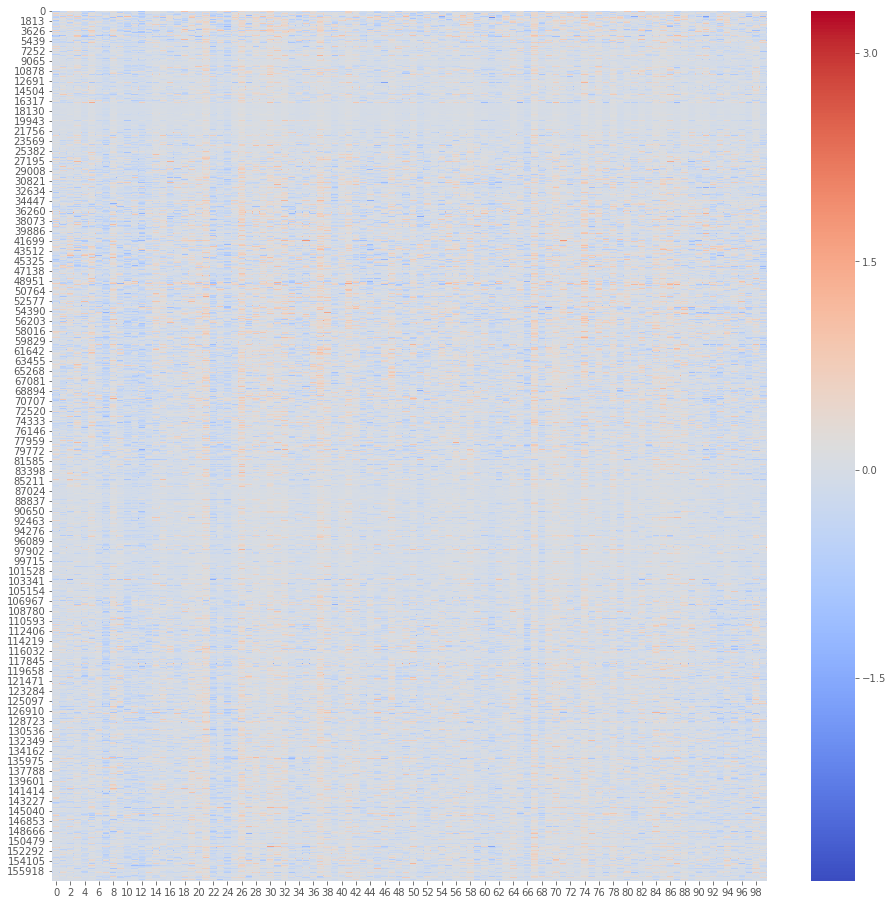

In [35]:
#heatmap for visualization
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(doc2vec,cmap="coolwarm")


In [37]:
#for clustering the documents we use Kmeans as our clustering algorithm

# importing KMeans library of sklearn
from sklearn.cluster import KMeans

def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model



In [38]:
X = doc2vec
kmeans5 = KMeans(5)

%time km5 = kmeans5.fit_predict(X)

CPU times: user 39.8 s, sys: 8.58 s, total: 48.4 s
Wall time: 31.5 s


In [40]:
kmeans6 = KMeans(6)
%time km6 = kmeans6.fit_predict(X)


CPU times: user 43.5 s, sys: 8.96 s, total: 52.4 s
Wall time: 33.9 s


In [41]:
kmeans7 = KMeans(7)
%time km7 = kmeans7.fit_predict(X)


CPU times: user 44.7 s, sys: 10.2 s, total: 54.9 s
Wall time: 34.3 s


In [45]:
kmeans10 = KMeans(10)
%time km10 = kmeans10.fit_predict(X)

CPU times: user 1min 2s, sys: 12.2 s, total: 1min 14s
Wall time: 48 s


In [46]:
kmeans4= KMeans(4)
%time km4 = kmeans4.fit_predict(X)

CPU times: user 38.6 s, sys: 7.92 s, total: 46.5 s
Wall time: 30.9 s


In [50]:
kmeans3= KMeans(3)
%time km3 = kmeans3.fit_predict(X)

CPU times: user 41.7 s, sys: 7.17 s, total: 48.9 s
Wall time: 34.9 s


In [86]:
kmeans2= KMeans(2)
%time km2 = kmeans2.fit_predict(X)

CPU times: user 14 s, sys: 6.38 s, total: 20.4 s
Wall time: 8.6 s


In [93]:
kmeans1= KMeans(1)
%time km1 = kmeans1.fit_predict(X)

CPU times: user 7.7 s, sys: 5.68 s, total: 13.4 s
Wall time: 1.85 s


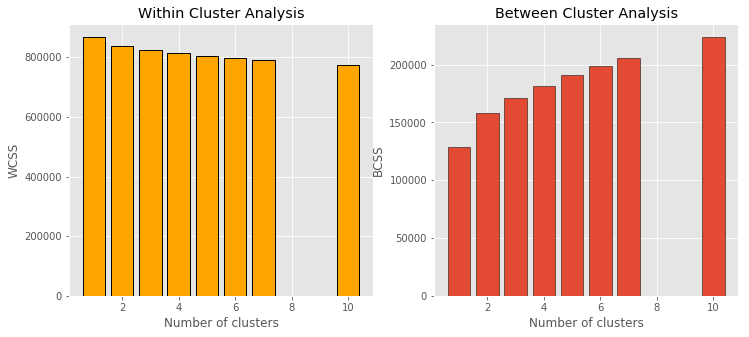

In [94]:
#Further analysis of clusters
models = [kmeans1, kmeans2, kmeans3,kmeans4, kmeans5, kmeans6, kmeans7, kmeans10]
def plot_WCSS_BCSS(models, data):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in models]
    n_clusts = [1,2, 3,4, 5,6,7, 10]
    
    ax[0].bar(n_clusts, wcss,color='orange', edgecolor='black', linewidth=1)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    ax[0].set_title('Within Cluster Analysis')
    
    
    ## Plot BCSS 
    n_1 = (float(data.shape[0]) * float(data.shape[1])) - 1.0
    tss = n_1 * np.var(data)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss,edgecolor='black')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    ax[1].set_title('Between Cluster Analysis')
    plt.show()
    

plot_WCSS_BCSS(models,X)


In [43]:
#Calculating Silhouette coefficients for choosing the number of clusters for our model
from sklearn.metrics import silhouette_score

def plot_silhouette(kms,data,nclusts):
    
    silhouette = []
    for i in kms:
        score = silhouette_score(data,i)
        print(score)
        silhouette.append(score)
    
    
    plt.bar(nclusts, silhouette,color = 'green')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()



0.06796254
0.06329936
0.063049674


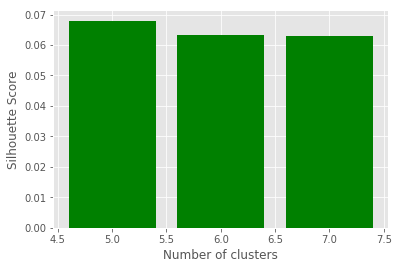

CPU times: user 30min 43s, sys: 7min 19s, total: 38min 2s
Wall time: 14min 37s


In [44]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
%time plot_silhouette([km1, km2, km3, km4,km5,km6,km7, km10],X,[1,2,3,4,5,6,7,10])

0.06698611
0.063049674
0.051625434


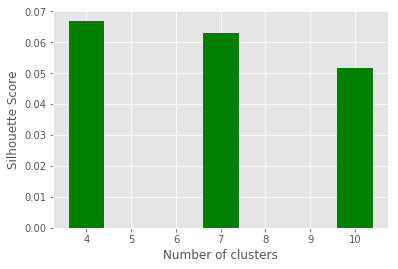

CPU times: user 30min 32s, sys: 7min 15s, total: 37min 48s
Wall time: 14min 29s


In [49]:
%time plot_silhouette([km4,km7,km10],X,[4,7,10])

In [54]:
%time plot_silhouette([km3,km4,km5],X,[3,4,5])

0.07954459


KeyboardInterrupt: 

0.09328821


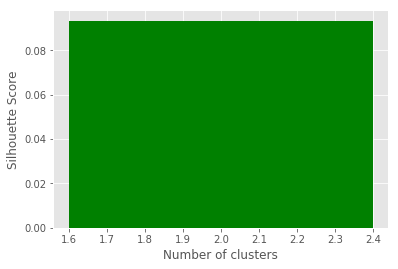

CPU times: user 10min 4s, sys: 2min 20s, total: 12min 25s
Wall time: 4min 52s


In [88]:
%time plot_silhouette([km2],X,[2])

In [95]:
%time plot_silhouette([km1],X,[1])

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [97]:

# Silhoute constant of 2 clusters came out closed to +1
meta_data['cluster_doc2vec_kmeans2'] = kmeans2.labels_
pca = PCA(n_components=2).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans2.cluster_centers_)


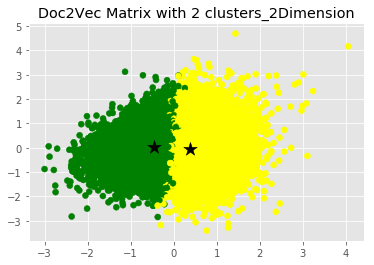

In [98]:
pca = PCA(n_components=2).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans2.cluster_centers_)
plt.scatter(data[:, 0], data[:, 1],c = color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#000000')
plt.title("Doc2Vec Matrix with 2 clusters_2Dimension")
plt.show()

In [99]:
dataframe =pd.DataFrame()
dataframe['cluster'] = meta_data['cluster_doc2vec_kmeans2']
dataframe['x'] =data[:, 0]
dataframe['y'] =data[:, 1]

In [100]:
dataframe.dropna(inplace=True)


In [102]:
#final dataframe after clustering
dataframe

,cluster,x,y
0,1,-0.403871,0.039580
1,1,-0.321036,0.121430
2,1,-0.805356,-0.156585
3,0,0.535095,0.018951
4,1,-0.113566,0.609633
...,...,...,...
157707,1,-0.583770,0.308412
157708,0,0.000788,-0.087189
157709,1,-0.392532,0.146404
157710,0,0.149228,-0.640595


In [103]:
#We are using ludwig text classificattion to train our classify our model according to the two clusters.
#We used parallel-cnn as our encoder
#input were the abstracts of all the papers from the dataset and classifies based on cluster number determined. 
!ludwig experiment \
  --data_csv datframe_with_two_clusters.csv \
  --model_definition_file model_definition_cord.yaml

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2.2.7 - Experiment

Experiment name: experiment
Model name: run
Output path: results/experiment_run_4


ludwig_version: '0.2.2.7'
command: ('/home/vineeta/.local/bin/ludwig experiment --data_csv '
 '/home/vineeta/datframe_with_two_clusters.csv --model_definition_file '
 'model_definition_cord.yaml')
random_seed: 42
input_data: '/home/vineeta/datframe_with_two_clusters.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   { 

/home/vineeta/.local/lib/python3.6/site-packages/ludwig/data/preprocessing.py:490: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  random_seed=random_seed
Writing dataset
Writing train set metadata with vocabulary
Training set: 110337
Validation set: 15793
Test set: 31582

╒══════════╕
│ TRAINING │
╘══════════╛

2020-06-26 01:59:01.888700: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-26 01:59:02.142377: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800000000 Hz
2020-06-26 01:59:02.144255: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x19844520 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-26 01:59:02.144340: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

Epoch   1
Training:   0

In [ ]:
#accuracy of training set = 88.1%
#accuracy of validation set = 74.1%
#accuracy of test set = 74.4%


In [ ]:
#visualizations
!ludwig visualize -v learning_curves --training_statistics results/experiment_run_3/training_statistics.json


![title](img/Training_clusters_hitsatk.png)

![title](img/Training_clusters_hitsatk.png)

![title](img/training_clsuters_combines.png)

![title](img/Training_clusters_hitsatk.png)

![title](img/Training_clusters_hitsatk.png)